## Table of contents

1. Prepare to start
2. Sneak a peek
    * Take a look
    * Size of the data
    * Dtypes
    * A magic feature?
    * Missing values
3. Basic Exploratory Analysis
    * Feature correlations
    * Distances between class medians
    * What logistic regression wants to tell us
    * The magic turtle again 
    * What about the column names?

## Prepare to start

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import os
print(os.listdir("../input"))

from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

['train.csv', 'sample_submission.csv', 'test.csv']


## Sneak a peek

### Take a look

In [3]:
train = pd.read_csv("../input/train.csv")
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,-0.227027,0.575964,1.541908,1.745286,-0.624271,3.600958,1.176489,-0.182776,-0.228391,1.682263,-0.833236,-4.377688,-5.372410,-0.477742,-0.179005,-0.516475,0.127391,-0.857591,-0.461500,2.160303,-2.118371,0.515493,-1.201493,-0.027377,-1.154024,0.753204,-0.179651,-0.807341,-1.663626,0.893806,...,-1.829848,2.347131,0.082462,-1.012654,0.593752,2.904654,-0.428974,-0.919979,2.849575,-0.906744,0.729459,0.386140,0.319814,-0.407682,-0.170667,-1.242919,-1.719046,-0.132395,-0.368991,-5.112553,-2.085988,-0.897257,1.080671,-0.273262,0.342824,0.640177,-0.415298,-0.483126,-0.080799,2.416224,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,0.783980,-1.280579,-1.003480,-7.753201,-1.320547,0.919078,-1.036068,0.030213,0.910172,-0.905345,0.646641,-0.465291,-0.531735,-0.756781,0.193724,0.224277,-0.474412,1.885805,0.205439,-6.481422,1.035620,-0.453623,0.375936,-0.320670,-0.144646,-0.220129,0.577826,-0.360512,-0.600107,0.008111,...,0.982205,-1.161978,0.532269,1.133215,0.003503,-1.390962,0.158572,0.143794,-0.317185,1.017192,-0.395342,-0.642357,-0.627209,0.257271,-1.461564,0.325613,1.628369,0.640040,0.750735,1.164573,0.900373,0.063489,0.948158,0.273014,-1.269147,-0.251101,-2.271731,-0.044167,-0.443766,-1.144794,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.28855

In [4]:
test = pd.read_csv("../input/test.csv")

### Insights

* Hey, we are given crazy column names! Can we find a meaning behind them? Hmm... ;-)
* Very interesting id-column, isn't it?

### Size of the data

In [5]:
train.shape[0] / test.shape[0]

1.999984741327352

Roughly we have twice as much train data than test data.

### Dtypes

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 258 entries, id to target
dtypes: float64(255), int64(2), object(1)
memory usage: 516.0+ MB


Hmm... two int columns?

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131073 entries, 0 to 131072
Columns: 257 entries, id to gamy-white-monster-expert
dtypes: float64(255), int64(1), object(1)
memory usage: 257.0+ MB


### A magic feature?

In [8]:
column_types = train.dtypes
column_types[column_types==np.int64]

wheezy-copper-turtle-magic    int64
target                        int64
dtype: object

Ohhh! :-D Cool! The wheezy-copper-turtle-magic oooohhh magic! What does that mean for the comp?

### Missing values

Let's start with obvious once:

In [9]:
train.isnull().sum().sum()

0

In [10]:
test.isnull().sum().sum()

0

No obvious missing values in train and test. Perhaps there are some non-obvious once but let's move this topic to exploratory data analysis.

## Basic exploratory analysis

Ok, now the colorful part starts. We have already found an interesting feature by peeking at the data. Perhaps we can find some more during basic EDA. Let's stay curious and critical! Do we know if test and train behave the same? No! For this reason, I don't like to combine train and test right now... :-)

### Class balance

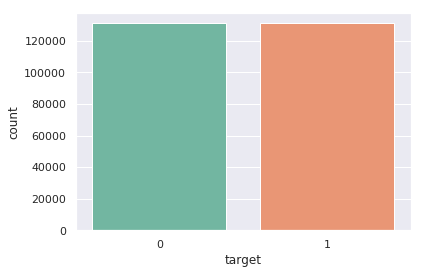

In [11]:
sns.countplot(train.target, palette="Set2");

Very balanced in train!

### Feature correlation

In [12]:
magic = "wheezy-copper-turtle-magic"
train_corr = train.drop(["target", magic], axis=1).corr()
test_corr = test.drop(magic, axis=1).corr()

In [ ]:
train_corr_flat = train_corr.values.flatten()
train_corr_flat = train_corr_flat[train_corr_flat != 1]

test_corr_flat = test_corr.values.flatten()
test_corr_flat = test_corr_flat[test_corr_flat != 1]

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train_corr_flat, ax=ax[0], color="tomato")
sns.distplot(test_corr_flat, ax=ax[1], color="limegreen");
ax[0].set_title("Off-diagonal train corr \n distribution")
ax[1].set_title("Off-diagonal test corr \n distribution");
ax[0].set_xlabel("feature correlation value")
ax[1].set_xlabel("feature correlation value");

### Insights

* Looks almost decorrelated. But don't be too fast. Maybe this slight values are still something fruitful. 
* Do you see what is missing in train? We have +- 0.015 in test on both sides but only -0.01 and +0.015 in train. There must be some differences in feature distributions between train and test.

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(train_corr, vmin=-0.016, vmax=0.016, cmap="RdYlBu_r");

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(test_corr, vmin=-0.016, vmax=0.016, cmap="RdYlBu_r");

### Insights

* If you compare correlations carefully, you can observe that some of the nearby features have some slight correlations in train and test. This is especially interesting for some subsequent features. Can we find some sense in the way of column order?
* This is not always true. Take a look at the lower right corner. The correlation between the last two features in train looks strong enough to "be" something, but in test this correlation has gone! As we have already seen by the correlation distributions we can expect some differences in the feature distributions of train and test. 

In [ ]:
target_medians = train.groupby("target").median()
sorted_target_distance = np.abs(target_medians.iloc[0]-target_medians.iloc[1]).sort_values(ascending=False)

In [ ]:
sorted_target_distance.head()

In [ ]:
sorted_target_distance.tail()

:-o What's that? Wheezy-copper-turtle-magic... again!

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.distplot(train.loc[train.target==0, "wheezy-myrtle-mandrill-entropy"], color="Blue", ax=ax[0,0])
sns.distplot(train.loc[train.target==1, "wheezy-myrtle-mandrill-entropy"], color="Red", ax=ax[0,0])
sns.distplot(train.loc[train.target==0, "wheezy-copper-turtle-magic"], color="Blue", ax=ax[0,1])
sns.distplot(train.loc[train.target==1, "wheezy-copper-turtle-magic"], color="Red", ax=ax[0,1])
ax[1,0].scatter(train["wheezy-myrtle-mandrill-entropy"].values,
                train["skanky-carmine-rabbit-contributor"].values, c=train.target.values,
                cmap="coolwarm", s=1, alpha=0.5)
ax[1,0].set_xlabel("wheezy-myrtle-mandrill-entropy")
ax[1,0].set_ylabel("skanky-carmine-rabbit-contributor")
ax[1,1].scatter(train["wheezy-myrtle-mandrill-entropy"].values,
                train["wheezy-copper-turtle-magic"].values, c=train.target.values,
                cmap="coolwarm", s=1, alpha=0.5)
ax[1,1].set_xlabel("wheezy-myrtle-mandrill-entropy")
ax[1,1].set_ylabel("wheezy-copper-turtle-magic");

### Insights

Crazy turtle! :-D

* By taking the feature mean per target and computing distances between the classes I wanted to find features that show clear separating forces. But... even the feature with highest difference in classes medians looks like "no big deal" at all. 
* Our crazy magic turtle feature has no difference at all! And it's distribution is almost uniform even though the small bin peaks look interesting (just an artifact of plotting?). 
* By plotting two features with highest distances in class medians I wanted to see if we can see something like in don't overfit (overlapping gaussians)... but this time it doesn't look like that. Let's see what logistic regression tells us with its weights in the next step.
* The scatter plot of wheezy-copper-turtle-magic and our highest class median distance feature, "wheezy_myrtle-mandrill-entropy", looks indeed crazy! It's not that the turtle magic spreads smoothly with lower density over the whole space of the mandrills tails. No! It has some subsequent "peak" tails depending on the value of magic turtle. This again leads to the question: What role does the magic turtle play in this game?

### What logistic regression wants to tell us...

In [ ]:
n_splits=3
n_repeats=3

X=train.drop(["target", "id"], axis=1).values
y=train.target.values
XTest = test.drop("id", axis=1).values

scaler = StandardScaler()
X = scaler.fit_transform(X)
XTest = scaler.transform(XTest)

In [ ]:
X, x_val, y, y_val = train_test_split(X,y,test_size=0.2, stratify=y, random_state=2019)

In [ ]:
skf = RepeatedStratifiedKFold(n_repeats=n_repeats,
                              n_splits=n_splits,
                              random_state=2019)

p_val = np.zeros(y_val.shape)
pTest = np.zeros(XTest.shape[0])
for train_idx, test_idx in skf.split(X,y):
    
    x_train, x_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    lr=LogisticRegression(penalty="l1", C=1, solver="saga")
    lr.fit(x_train, y_train)
    p_test = lr.predict_proba(x_test)[:,1]
    p_val += lr.predict_proba(x_val)[:,1]
    pTest += lr.predict_proba(XTest)[:,1]
    print(roc_auc_score(y_test, p_test))

p_val /= (n_splits*n_repeats)
pTest /= (n_splits*n_repeats)


In [ ]:
print(roc_auc_score(y_val, p_val))

As Chris already pointed out, we won't get far by ignoring the pattern found with our magic turtle. 

### The magic turtle again

Can't get enough! :-) Let's look at a 3D-Scatterplot with magic turtle:

In [ ]:
feat1 = "wheezy-myrtle-mandrill-entropy"
feat2 = "skanky-carmine-rabbit-contributor"
feat3 = "wheezy-copper-turtle-magic"

In [ ]:
N = 10000

trace1 = go.Scatter3d(
    x=train[feat1].values[0:N], 
    y=train[feat2].values[0:N],
    z=train[feat3].values[0:N],
    mode='markers',
    marker=dict(
        color=train.target.values[0:N],
        colorscale = "Jet",
        opacity=0.3,
        size=2
    )
)

figure_data = [trace1]
layout = go.Layout(
    title = 'The turtle place',
    scene = dict(
        xaxis = dict(title=feat1),
        yaxis = dict(title=feat2),
        zaxis = dict(title=feat3),
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    showlegend=True
)

fig = go.Figure(data=figure_data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(20,25))
for turtle1 in range(5):
    for turtle2 in range(5):
        my_turtle=turtle2+turtle1*5
        ax[turtle1, turtle2].scatter(train.loc[train["wheezy-copper-turtle-magic"]==my_turtle, feat1].values,
                                     train.loc[train["wheezy-copper-turtle-magic"]==my_turtle, feat2].values,
                                     c=train.loc[train["wheezy-copper-turtle-magic"]==my_turtle, "target"].values, cmap="coolwarm", s=5, alpha=0.5)
        ax[turtle1, turtle2].set_xlim([-15,15])
        ax[turtle1, turtle2].set_ylim([-15,15])

### Insights

* Very cool and beautiful again! :-)
* Choose some other features for feat1 and feat2. By doing so you will definitely find some spread that separates target classes! 

### What about the column names?

Have you asked yourself as well who had this nice phantasy to build up the column names? Is there a logic behind it? Can we find connections given the column names? Well I don't know it and we all have to work on it but perhaps a sketch helps...

In [ ]:
names = list(train.drop(["id", "target"], axis=1).columns.values)

In [ ]:
first_names = []
second_names = []
third_names = []
fourth_names = []

for name in names:
    words = name.split("-")
    first_names.append(words[0])
    second_names.append(words[1])
    third_names.append(words[2])
    fourth_names.append(words[3])

In [ ]:
print(len(first_names), len(np.unique(first_names)))
print(len(second_names), len(np.unique(second_names)))
print(len(third_names), len(np.unique(third_names)))
print(len(fourth_names), len(np.unique(fourth_names)))

Let's follow the idea that these names indeed have some meaning... in this case: what are features to discard? Is there one more magic feature and what makes it magically?

In [ ]:
feature_names = pd.DataFrame(index=train.drop(["target", "id"], axis=1).columns.values, data=first_names, columns=["kind"])
feature_names["color"] = second_names
feature_names["animal"] = third_names
feature_names["goal"] = fourth_names
feature_names.head()

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="kind", data=feature_names, order=feature_names.kind.value_counts().index, palette="Greens_r")
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="animal", data=feature_names, order=feature_names.animal.value_counts().index, palette="Oranges_r")
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="color", data=feature_names, order=feature_names.color.value_counts().index, palette="Purples_r")
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="goal", data=feature_names, order=feature_names.goal.value_counts().index, palette="Reds_r")
plt.xticks(rotation=90);

In [ ]:
feature_names[feature_names.goal=="learn"]

### Ideas and insights

Puhhh.... breath in and out. That looks like a further puzzle to solve... perhaps... probably... hopefully :-) 

1. The one turtle magic, is one magic.
2. There a lot of further goal descriptions that could be interpretable or at least leave a guess on what to try out with them.
3. Color has a natural order. Do we need this kind of order somewhere?
4. A lot of animals only have one or two occurences. But perhaps it's not about a single animal name and we can introduce a higher level of abstraction like "bird" or "dog" instead of a specific species of dogs, birds etc..
5. The kind is a mysterium for me... perhaps the length of these adjectives is important or the first character or we can find a grouping given the other feature names?!

Would be great to create a connection map... who is connected with who? Can we visualize a network? Could be a good timepoint to learn how to realize that. 

### Duplicates?

In [ ]:
combined = train.drop(["id", "target"], axis=1).append(test.drop("id", axis=1))
combined[combined.duplicated()]

## Diving into single datasets

How many single rows do we have given a single magic turtle value? Do all subsets in the data have the same amount of samples?

In [ ]:
n_subsamples_test = test.groupby(magic).size() 
n_subsamples_train = train.groupby(magic).size() 

plt.figure(figsize=(20,5))
plt.plot(n_subsamples_test.values, '.-', label="test")
plt.plot(n_subsamples_train.values, '.-', label="train")
plt.plot(n_subsamples_test.values + n_subsamples_train.values, '.-', label="total")
plt.legend();
plt.xlabel(magic)
plt.ylabel("sample count");

Obviously not! The zick-zack nature above seemed to be a plotting artifact. 

### Choosing a subset

In [13]:
my_magic=0

train_subset = train.loc[train[magic]==my_magic].copy()
test_subset = test.loc[test[magic]==my_magic].copy()

In [34]:
n_splits=20
n_repeats=5

X=train_subset.drop(["target", "id"], axis=1).values
y=train_subset.target.values
XTest = test_subset.drop("id", axis=1).values

#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#XTest = scaler.transform(XTest)

X, x_val, y, y_val = train_test_split(X,y,test_size=0.2, stratify=y, random_state=2019)

In [58]:
skf = RepeatedStratifiedKFold(n_repeats=n_repeats,
                              n_splits=n_splits,
                              random_state=2019)

importances = np.zeros(shape=(n_splits*n_repeats, XTest.shape[1]))
p_val = np.zeros(y_val.shape)
pTest = np.zeros(XTest.shape[0])

m=0
for train_idx, test_idx in skf.split(X,y):
    
    x_train, x_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    lr=LogisticRegression(penalty="l1", C=0.1, solver="liblinear", max_iter=300)
    lr.fit(x_train, y_train)
    p_test = lr.predict_proba(x_test)[:,1]
    p_val += lr.predict_proba(x_val)[:,1]
    pTest += lr.predict_proba(XTest)[:,1]
    importances[m,:] += lr.coef_[0]
    print(roc_auc_score(y_test, p_test))
    m+=1

p_val /= (n_splits*n_repeats)
pTest /= (n_splits*n_repeats)

0.8016528925619836
0.8264462809917356
0.8099173553719008
0.7355371900826446
0.859504132231405
0.8016528925619835
0.8677685950413223
0.6115702479338844
0.7768595041322314
0.6694214876033058
0.8999999999999999
0.9181818181818182
0.6909090909090909
0.8636363636363636
0.8
0.9363636363636363
0.8272727272727273
0.77
0.72
0.92
0.7520661157024794
0.8347107438016529
0.8347107438016529
0.8016528925619835
0.7107438016528925
0.7851239669421487
0.8181818181818182
0.8181818181818181
0.8099173553719008
0.8842975206611571
0.8545454545454545
0.6454545454545454
0.6181818181818182
0.7636363636363636
0.7636363636363637
1.0
0.8545454545454545
0.68
0.8200000000000001
0.8900000000000001
0.8925619834710744
0.8677685950413223
0.7933884297520661
0.7024793388429752
0.7107438016528926
0.7933884297520661
0.9256198347107438
0.8925619834710743
0.7272727272727273
0.5785123966942148
0.6
0.7454545454545455
0.8363636363636364
0.9636363636363636
0.7727272727272727
0.9545454545454545
0.8636363636363636
0.71
0.980000000000